# The Buy Now & Pay Later (BNPL) project
## Introduction 
Buy Now, Pay Later (BNPL) is a firm offering a new “Pay in 5 Installments” feature. Merchants (also known as retailers) are looking to boost their customer base by forming a partnership with this firm and in return, the BNPL firm gets a small percentage of revenue (take rate) to cover operating cost.
This industry project aims to generate a robust ranking system with insights to assist this BNPL firm in finding which merchants they should accept, we also separate the merchants into four segments with business areas and ranked the top-10 merchants in the business area.

This notebook intend to summarising the overall approach taken and the limitations/assumptions we made.




## Approach
### Data
#### we use different data from reliable resources

- ABS census data (by POS AND STATE)
- merchant transaction data
- industry turnover data

### Preprocessing
#### we use different preprocess method to build the ranking model
- Data cleaning

- Null value evaluation

- external ABS data merge to transaction data *

- Data normalization

- Outlier detection and removal ** 

- fraud data evaluation

<b>*</b>we first merge to ABS data with transaction post code, for the leftover postcode which not cover by the ABS data, we will merge those with the corresponding state ABS data.
<br><b>**</b>we exclude the merchant that meet these two conditions: 1. has revenue less then 50,000 2. transaction number less then 10  

### Ranking Algorithm 

Our approach to the rank system is to esitmate the merchant expected revenue after join the BNPL and the merchants are ranked by expected revenue:

**expected revenue = ap_rate * total_transaction_count * avg_transaction_amount * take_rate_revenue**.

where 

**ap_rate** is the percentage of customers who are likely to use afterpay for their orders, which is calculated combining customer gender, rent and income based on their recorded postcode;

**total_transaction_count** is the expected count of transactions of this merchant after cooparated with BNPL company, (i.e. there will be a 7% increasing on transactions statistically);

**avg_transaction_amount** is the average amount of existing transactions for this merchant;

**take_rate_revenue** is the provided rate of total transaction amount that is the revenue of BNPL company.


### Result & Findings

Based on our ranking system, it is found that Top 100 merchants could produce \\$2.2 million revenue for BNPL firm, and Top 10 merchants in 4 business segments could produce \\$1.17 million revenue.


Merchants in Household and recreation segment produce a larger porportion of revenue for the BNPL firm, while merchants in fashion and electronic segment in top 10 merchants of 4 business segment produce only 26.5% of revenue for BNPL firm, while accounting for 50% of the merchants selected (20/40). 


BNPL firm should focus more on merchants in 
1. Household 
2. Recreation 

As these two segment have a higher chance of producing more revenue for BNPL firm. 

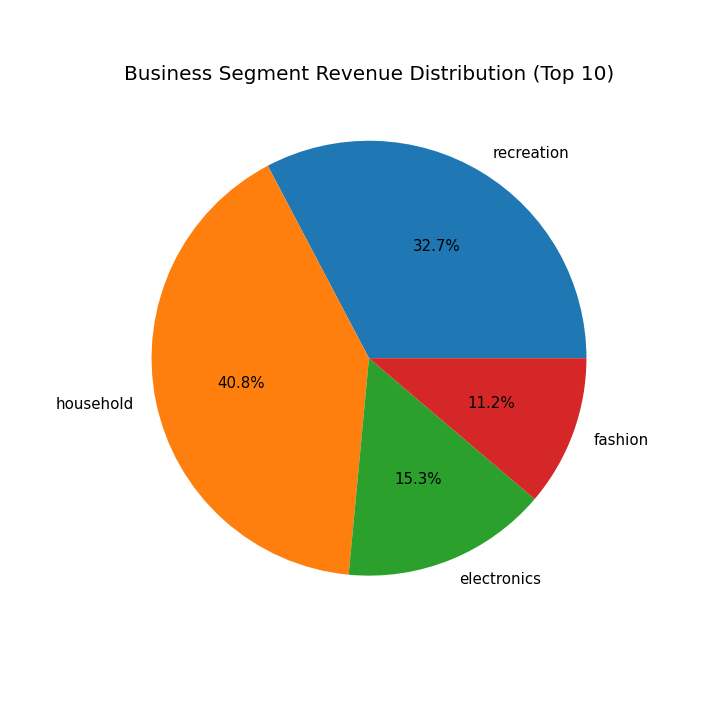

It is also found that most merchants are with revenue level of "a" & "b". This is due to the low take rate per transaction for the higher revenue band merchants ("e" & "d"). 

Highest take rate for highest revenue level "e" is 0.48%, while lowest take rate for lowest revenue level "a" is 5.5%. Even though higher revenue band merchants might have higher total transaction value, the take rate for each transaction is so low that lower revenue band merchants could beat this BNPL revenue with much lower transaction cost. That's why high revenue level merchants are not favoured in this ranking. However, by taking lower revenue merchants, BNPL firm may face higher risk

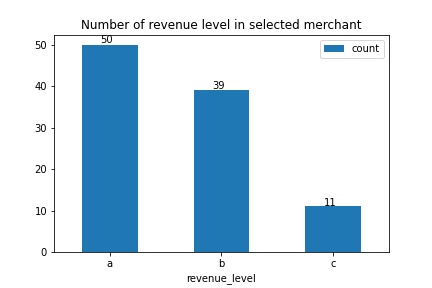

In [1]:
import pandas as pd

### Top 100 merchants

In [2]:
pd.read_parquet("../data/curated/selected/top_100_selected/")

,name,merchant_abn,revenue_level,true_revenue
0,Orci In Consequat Corporation,32361057556,a,43766.742919
1,Lacus Consulting,45629217853,a,42207.577787
2,Ornare Limited,96680767841,a,39728.917083
3,Mauris Non Institute,21439773999,a,39120.004308
4,Est Nunc Consulting,89726005175,a,38512.820053
...,...,...,...,...
95,Lobortis Ultrices LLC,61080648284,a,10648.997719
96,Iaculis LLC,23338656015,b,10456.723436
97,Sed Nec Inc.,88699453206,b,10345.272137
98,Torquent Per Inc.,70009327857,c,10334.996132


## Top 10 recreation merchants

In [3]:
pd.read_parquet("../data/curated/selected/selected_recreation_merchant/")

,name,merchant_abn,revenue_level,true_revenue
0,Orci In Consequat Corporation,32361057556,a,43766.742919
1,Lacus Consulting,45629217853,a,42207.577787
2,Lobortis Ultrices Company,64403598239,a,38210.088845
3,Magna Malesuada Corp.,67978471888,a,36923.284897
4,Dictum Phasellus In Institute,94493496784,a,36284.533640
5,Elit Sed Consequat Associates,40515428545,a,34353.536435
6,Odio Phasellus Institute,63123845164,a,33735.956794
7,Phasellus At Company,79417999332,b,33074.781888
8,Nullam Consulting,72472909171,a,32167.069700
9,Tellus Aenean Corporation,27326652377,a,30423.656221


## Top 10 electronic merchants

In [4]:
pd.read_parquet("../data/curated/selected/selected_electronic_merchant/")

,name,merchant_abn,revenue_level,true_revenue
0,Orci In Consequat Corporation,32361057556,a,43766.742919
1,Lacus Consulting,45629217853,a,42207.577787
2,Lobortis Ultrices Company,64403598239,a,38210.088845
3,Magna Malesuada Corp.,67978471888,a,36923.284897
4,Dictum Phasellus In Institute,94493496784,a,36284.533640
5,Elit Sed Consequat Associates,40515428545,a,34353.536435
6,Odio Phasellus Institute,63123845164,a,33735.956794
7,Phasellus At Company,79417999332,b,33074.781888
8,Nullam Consulting,72472909171,a,32167.069700
9,Tellus Aenean Corporation,27326652377,a,30423.656221


## Top 10 household merchants

In [5]:
pd.read_parquet("../data/curated/selected/selected_household_merchant/")

,name,merchant_abn,revenue_level,true_revenue
0,Ornare Limited,96680767841,a,39728.917083
1,Est Nunc Consulting,89726005175,a,38512.820053
2,Etiam Bibendum Industries,38700038932,a,36430.268751
3,Ac Ipsum LLC,80551528183,b,31630.093244
4,Phasellus At Limited,76767266140,b,30628.084659
5,Luctus Et Incorporated,49549583265,a,30100.626867
6,Amet Risus Inc.,79827781481,a,28800.457005
7,Non Vestibulum Industries,49891706470,a,28426.296435
8,Lorem Ipsum Sodales Industries,43186523025,b,28308.977411
9,Diam Eu Dolor LLC,90568944804,b,26953.984708


## Top 10 fashion merchants

In [6]:
pd.read_parquet("../data/curated/selected/selected_fashion_merchant/")

,name,merchant_abn,revenue_level,true_revenue
0,Dignissim Maecenas Foundation,48534649627,a,37992.519009
1,Leo In Consulting,86578477987,a,36308.459749
2,Gravida Mauris Incorporated,49322182190,a,28798.587561
3,Commodo Ipsum Industries,19492220327,b,20767.518588
4,Blandit At LLC,11439466003,a,20088.496428
5,Dolor Quisque Inc.,93558142492,b,18853.320487
6,At Pede Inc.,95574756848,a,17358.932642
7,Sociosqu Corp.,99976658299,a,16660.979479
8,Suspendisse Dui Corporation,46804135891,c,13434.684057
9,Nulla Facilisis Institute,81761494572,a,13369.956103


### limitations/assumptions